## Import Library

In [1]:
## Basic Library
import pandas as pd
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

## Visualization library
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_eda = pd.read_csv('SBAnational.csv', low_memory=False)
df_eda.sample(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
118935,1868645005,"DEVRIES AGENCY OF CALEDONIA, I",CALEDONIA,MI,49316,CAPITAL ONE NATL ASSOC,VA,524210,12-Jun-06,2006,...,N,N,NaN,30-Jun-06,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$25,000.00"
265605,2856225005,Best Buy Furniture,SAN LEANDRO,CA,94577,BANK OF AMERICA NATL ASSOC,NC,442110,11-Dec-07,2008,...,Y,N,14-Jun-11,31-Jan-08,"$54,500.00",$0.00,CHGOFF,"$35,000.00","$35,000.00","$17,500.00"
146749,2072314003,THATCHER ENGINEERING INC,MINNEAPOLIS,MN,55418,ASSOCIATED BANK NATL ASSOC,MN,541330,20-May-98,1998,...,0,N,NaN,31-Mar-99,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$68,000.00"
283908,2966135003,FIORE,FULLERTON,CA,92831,BBCN BANK,CA,453110,21-Feb-08,2008,...,N,N,3-Sep-09,29-Feb-08,"$25,000.00",$0.00,CHGOFF,"$23,123.00","$25,000.00","$21,250.00"
831620,8928624008,WALKING ON WATER INC,BRONXVILLE,NY,10708,FIRST NIAGARA BANK NATL ASSOC,NY,561740,15-Jun-05,2005,...,Y,N,NaN,31-Oct-05,"$36,564.00",$0.00,P I F,$0.00,"$25,000.00","$12,500.00"


## 1. Descriptive Statistics

### 1.A Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

In [3]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [4]:
df_eda.shape

(899164, 27)

In [5]:
## Value 1 = Existing Business, 2 = NewBusiness
df_eda['NewExist'].unique()

array([ 2.,  1.,  0., nan])

In [6]:
## Value 0 = Franchise, 1 = Not Franchise
df_eda['FranchiseCode'].unique()

array([    1,     0, 15100, ...,  2899, 18701, 15930])

In [7]:
## 1 = Urban, 2 = Rural, 0 = Undefined
df_eda['UrbanRural'].unique()

array([0, 1, 2])

In [8]:
## Y = Yes, N = No
df_eda['RevLineCr'].unique()

array(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7',
       'A', '5', '.', '4', '-', 'Q'], dtype=object)

In [9]:
## Y = Yes, N = No
df_eda['LowDoc'].unique()

array(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'], dtype=object)

In [10]:
## ChgOff = ChargeOff, PIF = Paid in Full
df_eda['MIS_Status'].unique()

array(['P I F', 'CHGOFF', nan], dtype=object)

In [11]:
df_eda['ApprovalFY'].unique()

array(['1997', '1980', '2006', '1998', '1999', '2000', '2001', '1972',
       '2003', '2004', '1978', '1979', '1981', '2005', '1962', '1982',
       '1965', '1966', '1983', '1973', '1984', '2007', '1985', '1986',
       '1987', '2008', '1988', '2009', '1989', '1991', '1990', '1974',
       '2010', '1967', '2011', '1992', '1993', '2002', '2012', '2013',
       '1994', '2014', '1975', '1977', '1976', '1968', '1976A', '1969',
       '1995', '1970', '1996', '1971'], dtype=object)

#### Result

- Data terdiri dari **899164 baris** dan **27 kolom**
- Terdapat tipe data yang kurang sesuai, yaitu:
    - Ada 3 kolom yang seharusnya tipe data **datetime** tetapi terdeteksi **object**, yaitu:
        1. ApprovalDate
        2. ChgOffDate
        3. DisbursementDate
    - Ada 6 kolom yang seharusnya tipe data **numerik** tetapi terdeteksi **object**, yaitu:
        1. DisbursementGross
        2. BalanceGross
        3. ChgOffPrinGr
        4. GrAppv
        5. SBA_Appv
    - Ada 1 kolom yang seharusnya tipe data **int** tetapi terdeteksi **float**, yaitu:
        1. NewExist
    - Ada 7 kolom yang seharusnya **str** karna datanya berbentuk category tetapi terdeteksi **int**, yaitu:
        1. LoanNr_ChkDgt
        2. Zip
        3. NewExist
        4. NAICS
        5. FranchiseCode
        6. UrbanRural
        7. ApprovalFY
- Terdapat 6 kolom yang isinya kurang sesuai, yaitu:
    - Ada 2 kolom yang seharusnya output **Y dan N** tetapi **outputnya tidak hanya Y dan N**, yaitu:
        1. LowDoc
        2. RevLineCr
    - Ada 3 kolom yang seharusnya output **1 dan 0** tetapi **outputnya tidak hanya 1 dan 0**, yaitu:
        1. UrbanRural
        2. FranchiseCode
        3. NewExist
    - Ada kolom yang terjadi kesalahan input, yaitu:
        1. ApprovalFY

### Lakukan perubahan tipe data

**object to datetime**

In [12]:
datetime = ['ApprovalDate', 'ChgOffDate', 'DisbursementDate']
df_eda[datetime] = df_eda[datetime].apply(pd.to_datetime)

In [13]:
df_eda[['ApprovalDate', 'ChgOffDate', 'DisbursementDate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ApprovalDate      899164 non-null  datetime64[ns]
 1   ChgOffDate        162699 non-null  datetime64[ns]
 2   DisbursementDate  896796 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 20.6 MB


**object to numeric**

In [14]:
df_eda[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].sample(2)

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
426019,"$50,000.00",$0.00,$0.00,"$50,000.00","$25,000.00"
673652,"$450,000.00",$0.00,$0.00,"$450,000.00","$337,500.00"


In [15]:
## terdapat simbol $ pada output dikolom sehingga tidak bisa diubah ke numeric
## lakukan cleansing simbol $ pada kolom
currency = ['DisbursementGross','BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
df_eda[currency] = df_eda[currency].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))

## kemudian ubah tipe datanya
df_eda[currency] = df_eda[currency].astype(float)

In [16]:
# Membuat fungsi untuk membersihkan value string
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x
    
# Cleansing data dan merubah tipe data ApprovalFY menjadi numeric (int)
df_eda['ApprovalFY'] = df_eda['ApprovalFY'].apply(clean_str).astype('int')
df_eda['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, 1969, 1995, 1970, 1996, 1971])

In [17]:
df_eda[['DisbursementGross','BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'ApprovalFY']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DisbursementGross  899164 non-null  float64
 1   BalanceGross       899164 non-null  float64
 2   ChgOffPrinGr       899164 non-null  float64
 3   GrAppv             899164 non-null  float64
 4   SBA_Appv           899164 non-null  float64
 5   ApprovalFY         899164 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 41.2 MB


**float to int**

In [18]:
## Sebelum melakukan perubahan tipe data drop null values yang ada di NewExist
df_eda.dropna(subset=['NewExist'], inplace=True)

## ubah tipe data NewExist menjadi int
df_eda['NewExist'] = df_eda['NewExist'].astype(int)

## Lalu cek kembali outputnya
df_eda['NewExist'].unique()

array([2, 1, 0])

In [19]:
df_eda[['NewExist']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899028 entries, 0 to 899163
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   NewExist  899028 non-null  int64
dtypes: int64(1)
memory usage: 13.7 MB


**numeric to object**

In [20]:
df_eda['NAICS'] = df_eda['NAICS'].astype(str)

In [21]:
df_eda[['NAICS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899028 entries, 0 to 899163
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   NAICS   899028 non-null  object
dtypes: object(1)
memory usage: 13.7+ MB


### Lakukan cleansing value

**NewExist**

In [22]:
df_eda['NewExist'].unique()

array([2, 1, 0])

In [23]:
df_eda['NewExist'].value_counts()

1    644869
2    253125
0      1034
Name: NewExist, dtype: int64

In [24]:
df_eda = df_eda.loc[df_eda['NewExist'].isin([2, 1])]

In [25]:
df_eda['NewExist'].value_counts()

1    644869
2    253125
Name: NewExist, dtype: int64

**FranchiseCode**

In [26]:
df_eda['FranchiseCode'].value_counts()

1        637649
0        208650
78760      3364
68020      1918
50564      1032
          ...  
16165         1
63615         1
3488          1
47859         1
15930         1
Name: FranchiseCode, Length: 2767, dtype: int64

In [27]:
## Lakukan cleansing dengan cara jika > 1 maka hasil 1 jika < 1 maka hasil 0
## Jika franchise = 1, Jika tidak = 0
df_eda['FranchiseCode'] = df_eda['FranchiseCode'].apply(lambda x: 1 if x >1 else 0)

In [28]:
df_eda['FranchiseCode'].value_counts()

0    846299
1     51695
Name: FranchiseCode, dtype: int64

### 1.B Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [29]:
## CEK NULL VALUES
df_eda.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    13
Zip                       0
Bank                   1557
BankState              1564
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4525
LowDoc                 2579
ChgOffDate           735382
DisbursementDate       2361
DisbursementGross         0
BalanceGross              0
MIS_Status             1989
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

#### Result
- Terdapat 11 kolom yang berisi null values, yaitu:
    - Name, City, State, Bank, BankState, NewExist, RevLineCr, LowDoc, ChgOffDate, DisbursementDate, MIS_Status

In [30]:
df_eda.dropna(subset=['Name', 'City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)
df_eda.isna().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           724414
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

### 1.C Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)

In [31]:
## Untuk kebutuhan statistic ganti tipe data kolom sesuai dengan tipe datanya
df_stat = df_eda.astype({
    'LoanNr_ChkDgt' : 'str',
    'Zip': 'str',
    'NewExist': 'str',
    'NAICS': 'str',
    'FranchiseCode': 'str',
    'UrbanRural': 'str',
    'ApprovalFY': 'str'
})

In [32]:
# Bedakan kolom numeric, categorical, dan time

## numeric dengan 9 kolom
numeric = ['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'BalanceGross',
           'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'
          ]

## categorical dengan 14 kolom
categorical = ['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
               'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'MIS_Status'
              ]

## time dengan 4 kolom
time = ['ApprovalDate', 'ApprovalFY', 'ChgOffDate', 'DisbursementDate']

**Descriptive Statistics - Time**

In [33]:
df_stat[time].describe()

,ApprovalDate,ApprovalFY,ChgOffDate,DisbursementDate
count,885219,885219,160805,885219
unique,9783,46,6423,8423
top,1993-07-07 00:00:00,2005,2010-03-13 00:00:00,1995-07-31 00:00:00
freq,1119,76884,726,9728
first,1973-02-06 00:00:00,NaN,1988-10-03 00:00:00,1973-01-03 00:00:00
last,2072-12-08 00:00:00,NaN,2026-10-22 00:00:00,2072-12-27 00:00:00


#### Result

1. Pada kolom **ChgOffDate** terdapat banyak null values, kolom ini menunjukkan tanggal ketika peminjam dinyatakan gagal bayar, jika peminjam berhasil bayar maka nilainya null ini penyebab kolom ini banyak terdapat null values. kolom ini kemungkinan besar akan didrop karna terdapat banyak sekali null values
2. **ApprovalDate** dan **ApprovalFY** merupakan kolom yang menunjukkan waktu pinjaman disetujui. kolom ini tidak dapat menjadi prediksi target sehingga sepertinya akan didrop. Terdapat juga anomali pada kolom **ApprovalDate** dimana waktu terakhirnya adalah 2072
3. **DisbursementDate** merupakan kolom yang menunjukkan tanggal pencairan. Terdapat anomali pada kolom ini dimana tanggal awal dan tanggal akhir pada dokumentasi dataset menunjukkan tahun **1987-2014**, kemungkinan ada kesalahan input sehingga harus dicek kembali sebaran datanya

**Descriptive Statistics - Numeric**

In [34]:
df_stat[numeric].describe()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,885219.000000,885219.000000,885219.000000,885219.000000,8.852190e+05,885219.000000,8.852190e+05,8.852190e+05,8.852190e+05
mean,110.918034,11.408668,8.436403,10.821980,2.020033e+05,3.036441,1.360034e+04,1.933505e+05,1.498483e+05
std,78.972262,74.025000,236.863237,237.325235,2.878513e+05,1453.476795,6.548333e+04,2.834276e+05,2.280918e+05
min,0.000000,0.000000,0.000000,0.000000,4.000000e+03,0.000000,0.000000e+00,1.000000e+03,5.000000e+02
25%,60.000000,2.000000,0.000000,0.000000,4.275450e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04
50%,84.000000,4.000000,0.000000,1.000000,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.200000e+04
75%,120.000000,10.000000,1.000000,4.000000,2.400000e+05,0.000000,0.000000e+00,2.260000e+05,1.750000e+05
max,569.000000,9999.000000,8800.000000,9500.000000,1.144632e+07,996262.000000,3.512596e+06,5.000000e+06,4.500000e+06


#### Result

1. Dapat dilihat dari jarak median dan meannya pada keseluruhan kolom bahwa datanya skewed
2. Dapat dilihat juga dari max-min keseluruhan kolom bahwa datanya juga memiliki outliers
3. **Term** merupakan kolom yang menunjukkan jangka waktu pinjaman. Terdapat anomali disini dimana nilai minimumnya adalah 0 sedangkan pada waktu pinjaman tidak mungkin ada < 1 bulan
4. **NoEmp** merupakan kolom yang menunjukkan jumlah karyawan. Terdapat anomali disini dimana nilai minimumnya adalah 0 dan tidak mungkin suatu bisnis tidak memiliki karyawan.

**Descriptive Statistics - Categorical**

In [35]:
df_stat[categorical].describe()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status
count,885219,885219,885219,885219,885219,885219,885219,885219,885219,885219,885219,885219,885219,885219
unique,885219,769038,32255,51,33492,5785,56,1311,2,2,3,18,8,2
top,1000014003,SUBWAY,LOS ANGELES,CA,10001,BANK OF AMERICA NATL ASSOC,CA,0,1,0,1,N,N,P I F
freq,1,1256,11464,129286,919,86036,116640,197973,636139,834089,464786,414512,774297,729240


1. **LoanNR_ChkDgt, Name, City, Zip, Bank** memiliki nilai unique sangat tinggi sehingga bisa didrop saja
2. **State** dan **BankState** bisa membuat feature baru dari kolom ini

### Univariate Analysis - Time

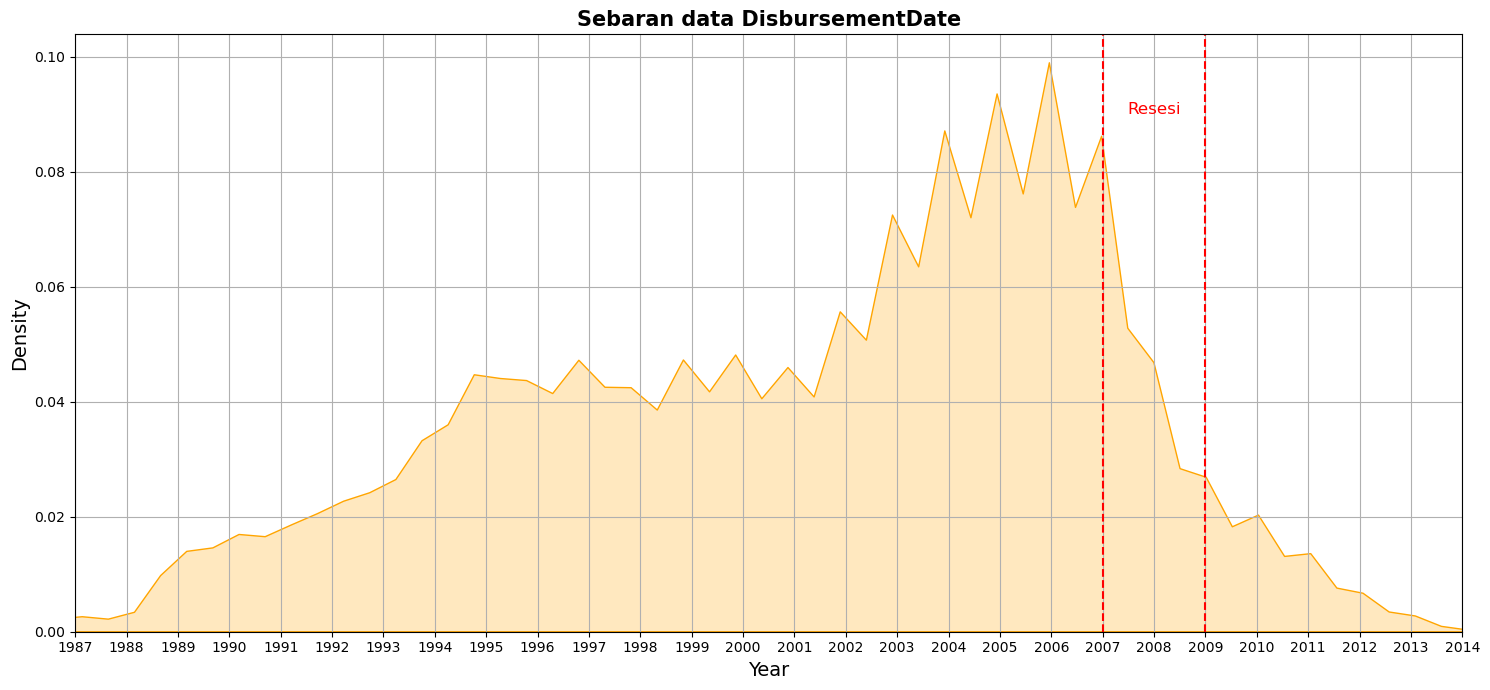

In [36]:
## Melihat sebaran data DisbursementDate pada tahun 1987-2014
plt.figure(figsize=(15, 7))
sns.kdeplot(df_stat['DisbursementDate'].dt.year, color='orange', shade=True)
plt.xlim(1987, 2014)
plt.xticks([i for i in range (1987,2015)])

plt.axvline(x=2007, color='red', linestyle='--')
plt.axvline(x=2009, color='red', linestyle='--')
plt.text(2008, 0.09, 'Resesi', color='red', fontsize=12, ha='center')

plt.title('Sebaran data DisbursementDate', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.grid()
plt.tight_layout()

#### Result

Jumlah pinjaman dari tahun ketahun meningkat, pada tahun **2007-2009** terjadi resesi menyebabkan pinjaman menurun untuk tahun-tahun selanjutnya 

### Univariate Analysis - Numeric

In [37]:
## Analisa akan dilakukan pada data dari tahun 1987 - 2014
df_eda = df_eda[(df_eda['DisbursementDate'].dt.year >= 1987) & (df_eda['DisbursementDate'].dt.year <= 2014)]

In [38]:
## Memilih feature yang berkemungkinan berpengaruh terhadap target berdasarkan statistic summary
## Untuk dilakukan univariate dan multivariate

numeric_viz = ['Term','NoEmp', 'CreateJob', 'RetainedJob',  'DisbursementGross',
               'GrAppv', 'SBA_Appv']

categorical_viz = ['NewExist','UrbanRural','RevLineCr','MIS_Status','LowDoc']

time_viz = ['DisbursementDate']

**Individual boxplot**

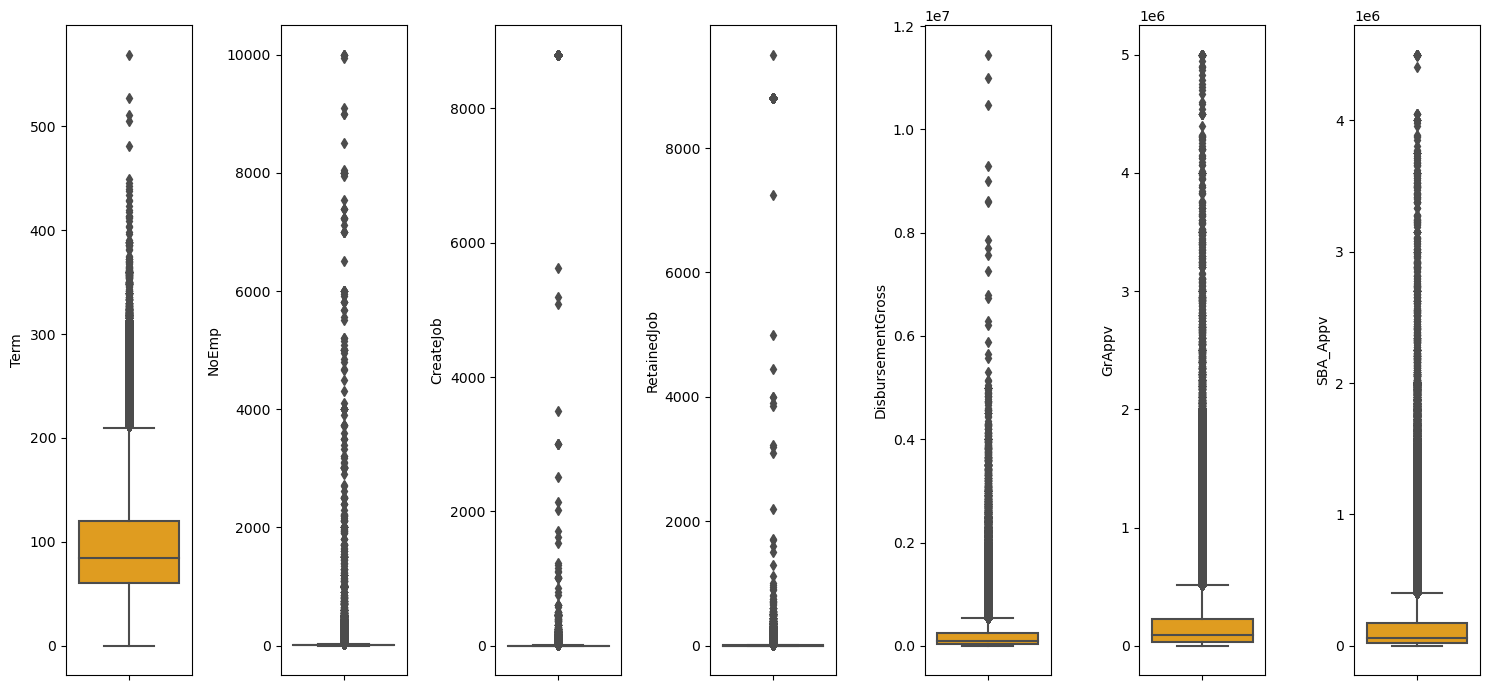

In [39]:
features = numeric_viz
plt.figure(figsize=(15,7))

for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_eda[features[i]], color='orange')
    plt.tight_layout()

**Individual displot**

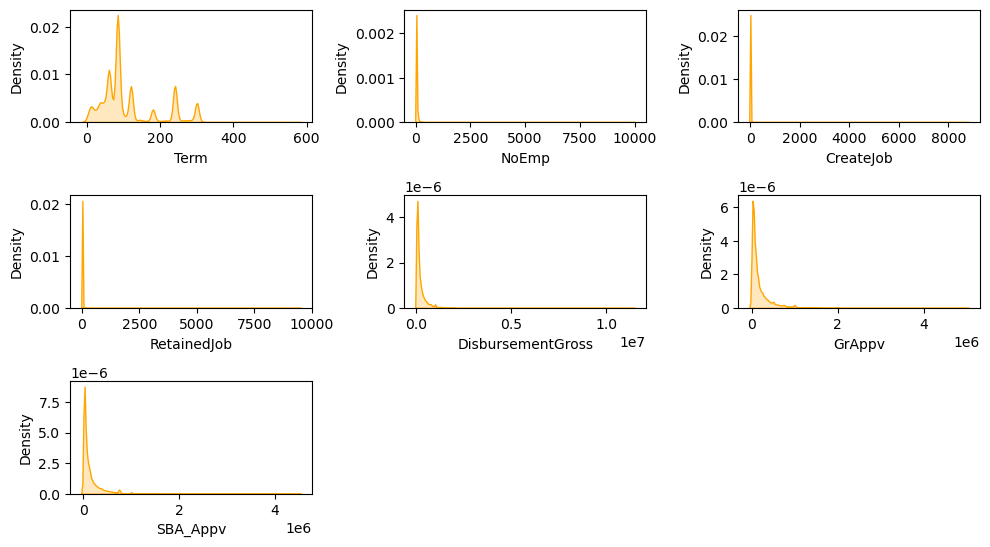

In [40]:
features = numeric_viz
plt.figure(figsize=(10,7))

for i in range(0, len(features)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=df_eda[features[i]], color='orange', shade=True)
    plt.xlabel(features[i])
    plt.tight_layout()

#### Result

Dapat dilihat pada kolom/feature numeric terdapat positif outliers/ skew kanan

### Univariate Analysis - Categorical

**Individual countplot**

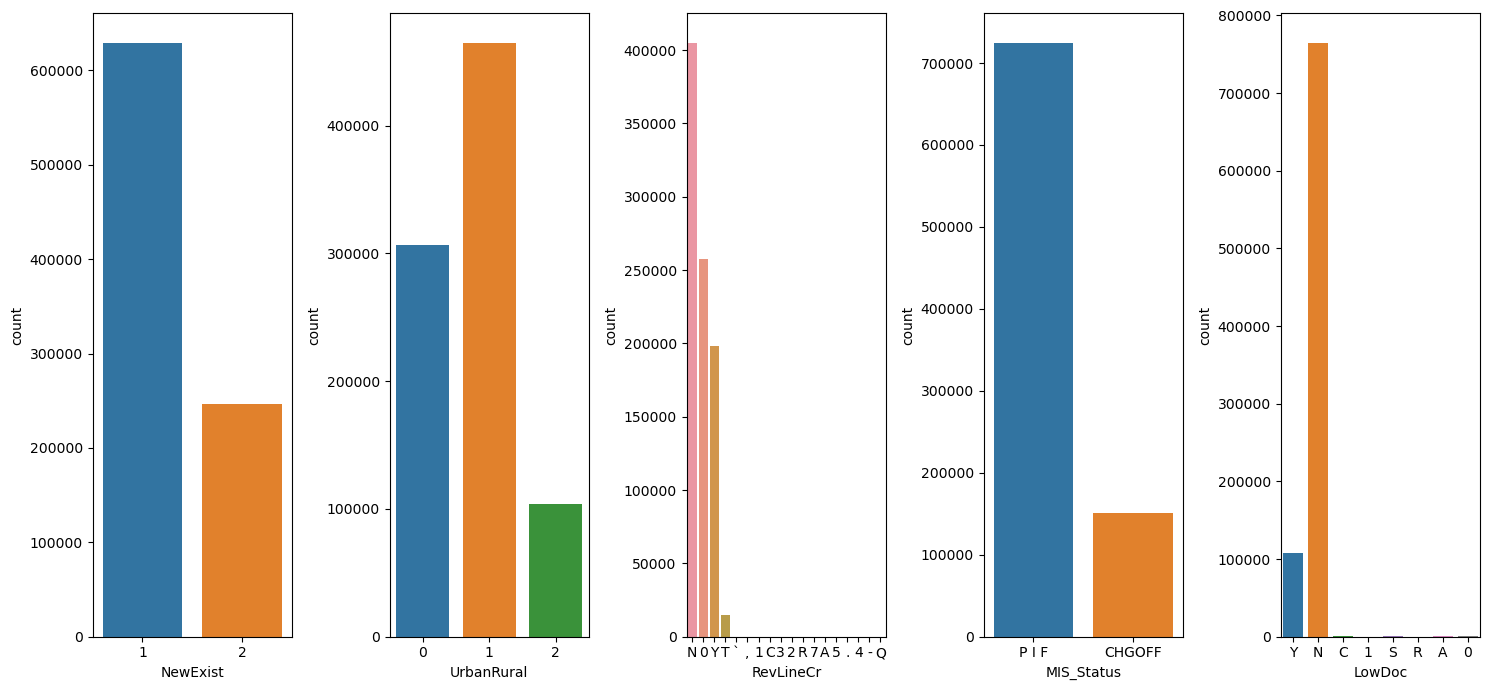

In [41]:
features = categorical_viz
plt.figure(figsize=(15,7))

for i in range(0, len(features)):
    plt.subplot(1, 5, i+1)
    sns.countplot(x=df_eda[features[i]])
    plt.tight_layout()

#### Result
1. dapat dilihat RevlineCr, LowDoc memiliki nilai error
2. NewExist dan MIS_Status kelihatannya imbalance
3. LowDoc imbalance

### Multivariate Analysis - Numeric

**Correlation heatmap**

Text(0.5, 1.0, 'Correlation Heatmap dari summary statistical')

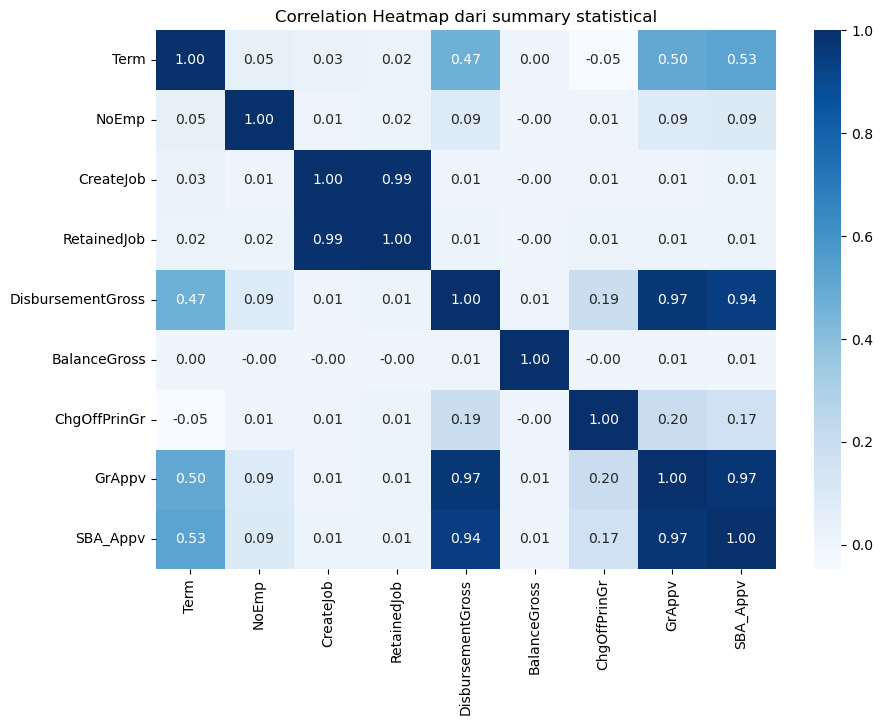

In [42]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_stat.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Correlation Heatmap dari summary statistical')

#### Result

1. **Term** memiliki korelasi yang positif dengan **SBA_Appv, GrAppv, DisbursementGross**. Ini mengindikasikan bahwa jangka waktu pinjaman lebih lama berpotensi memiliki nilai pinjaman yang lebih besar
2. **DisbursementGross, GrAppv, SBA_Appv** memiliki korelasi yang sangat kuat sehingga menyebabkan redundan. Maka perlu dipilih salah satu saja
3. **CreateJob, RetainedJob** memiliki korelasi yang sangat kuat sehingga menyebabkan redundan. Maka perlu dipilih salah satu saja
4. **DisbursementGross** memiliki korelasi positif dengan **NoEmp**, hal ini menunjukkan semakin banyak jumlah karyawan maka semakin besar jumlah pinjaman cair

**Pair plot**

In [43]:
## Menentukan jumlah sample menggunakan rumus slovin
N = df_stat.shape[0]
e = 0.05

slovin = N / (1+N * e**2)
slovin

399.81933540269563

<Figure size 1000x700 with 0 Axes>

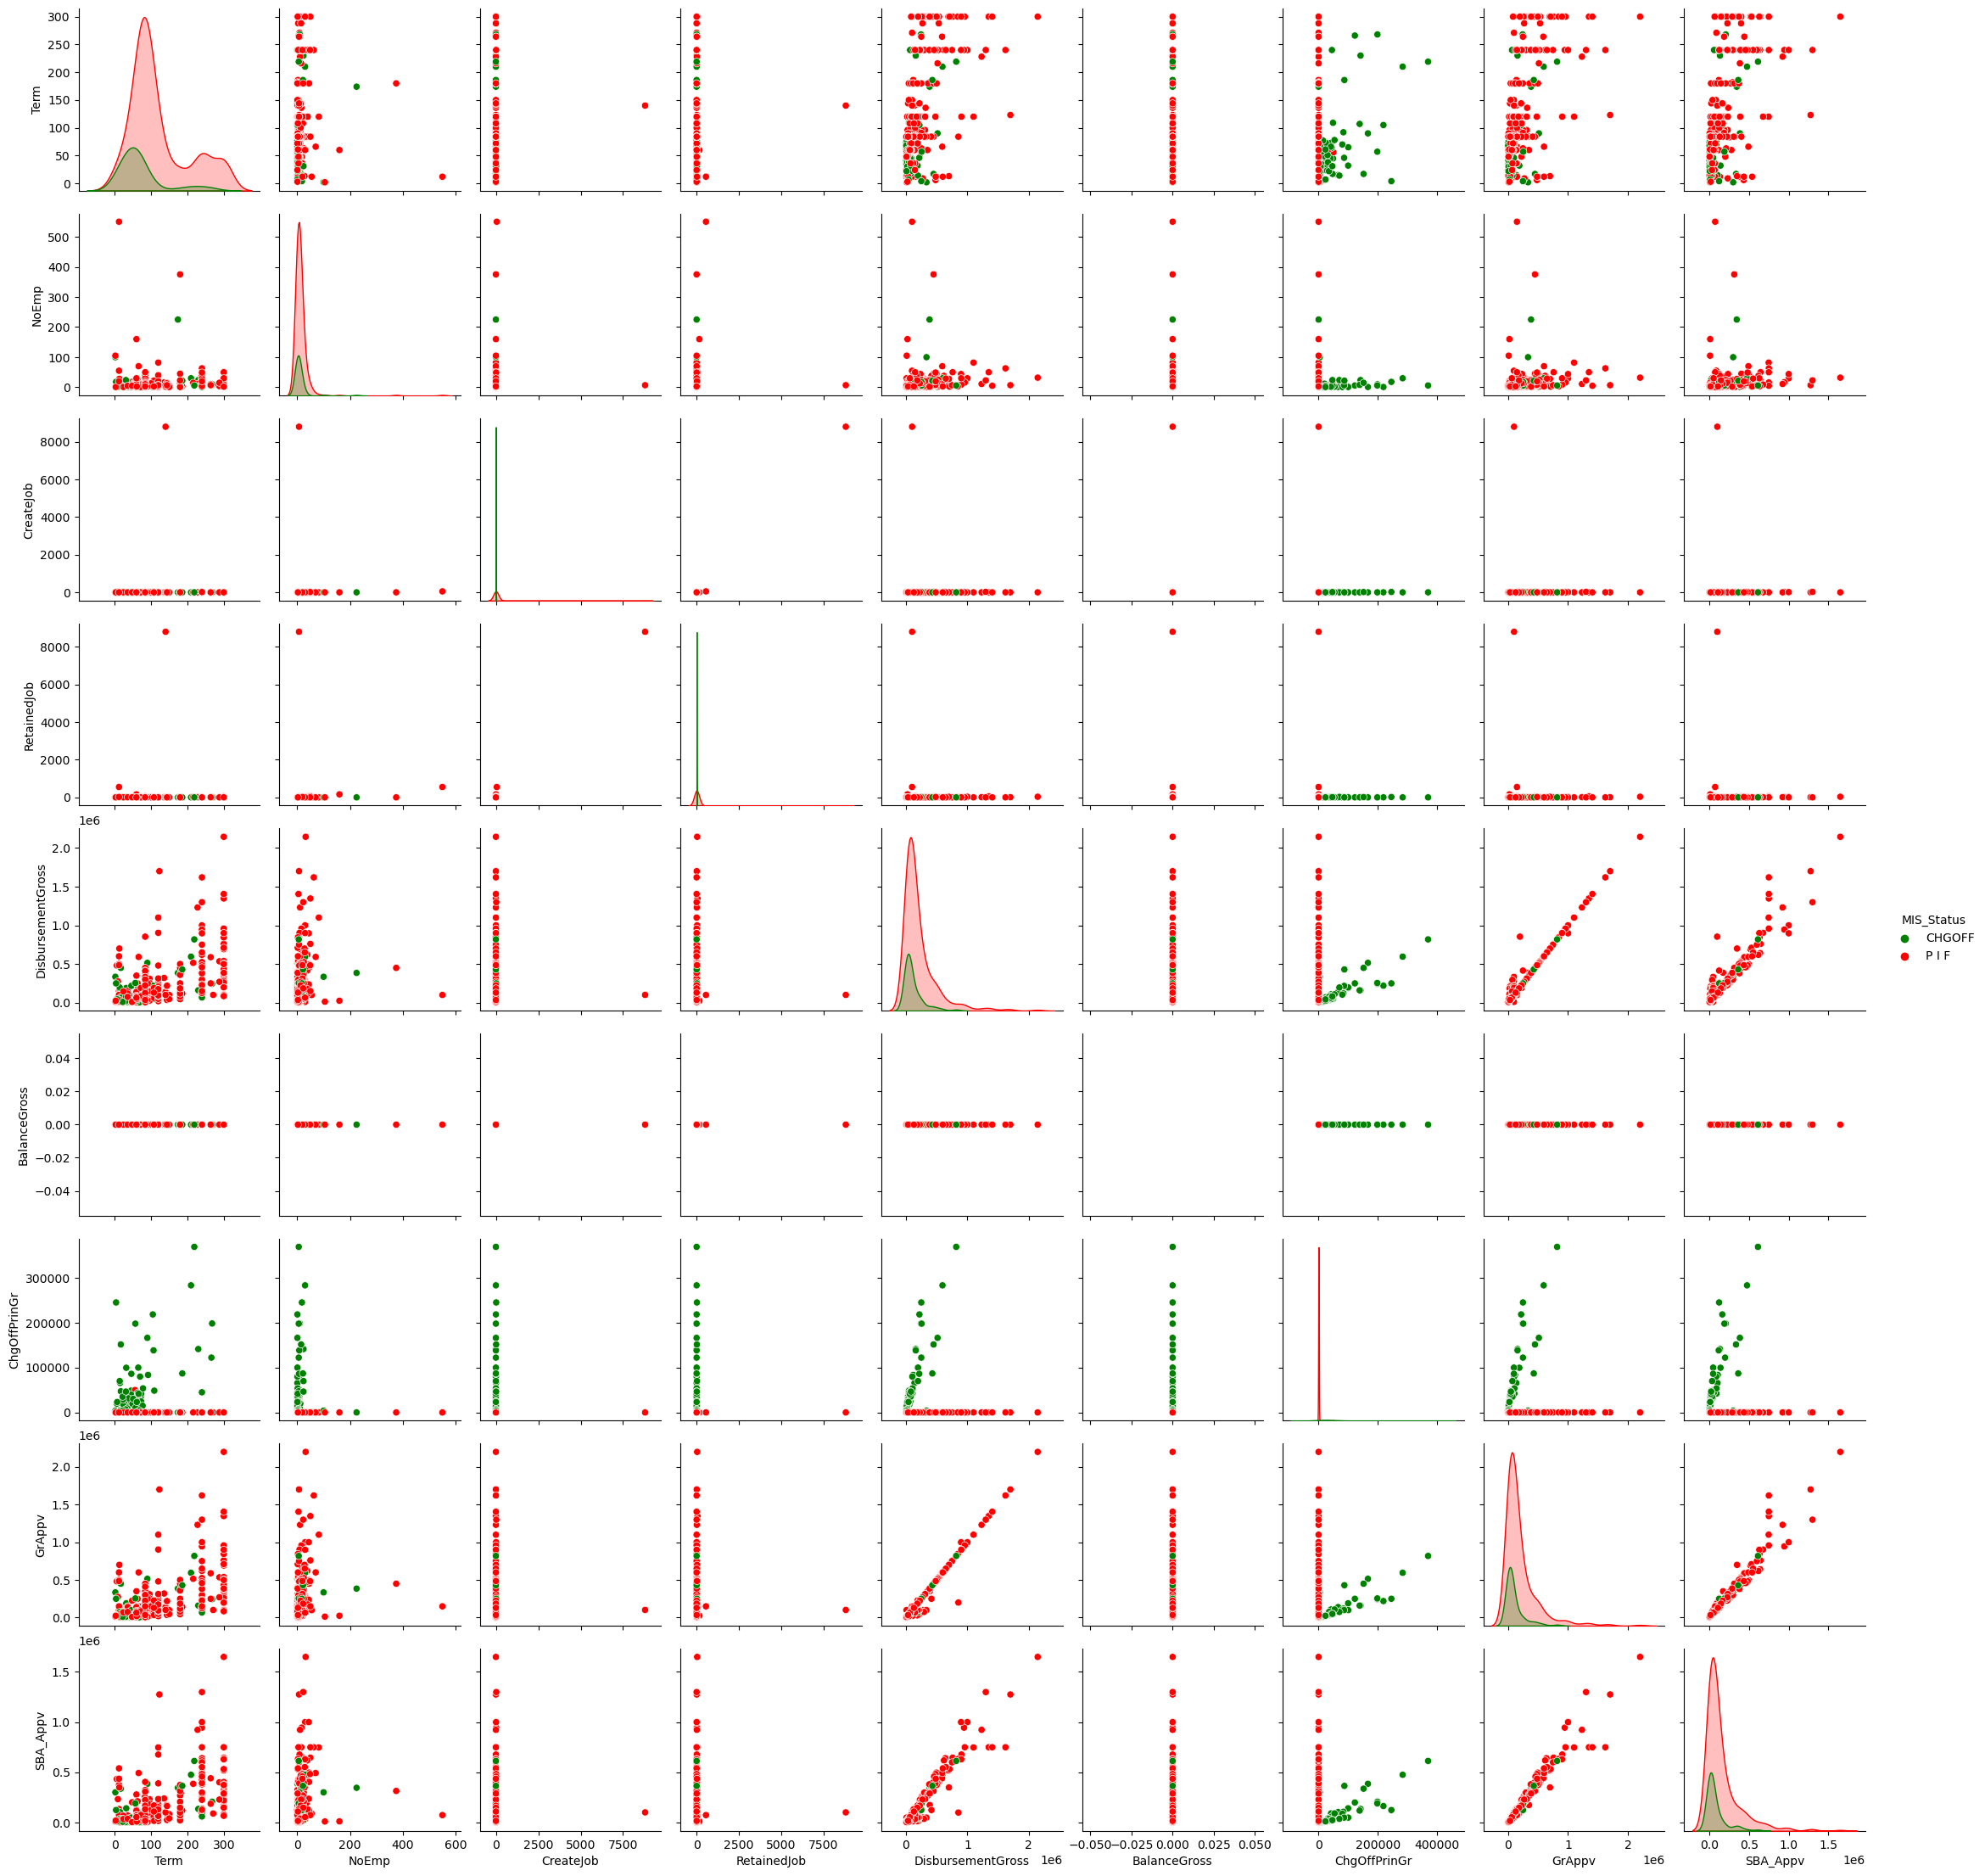

In [44]:
## Membuat pairplot menggunakan data sample
df_sample = df_stat.sample(n=400, random_state=42)
plt.figure(figsize=(10,7))
sns.pairplot(df_sample, diag_kind='kde', palette=['Green', 'Red'], hue='MIS_Status')

#### Result

1. **SBA_Appv, Gr_Appv, DisbursementGross** memiliki korelasi linear positif satu sama lain
2. **DisbursementGross** Nilai pencairan terpusat pada waktu pinjaman yang singkat
3. **NoEmp** tidak dapat memisahkan PIF dan CHGOFF dengan baik.

### Business Insight

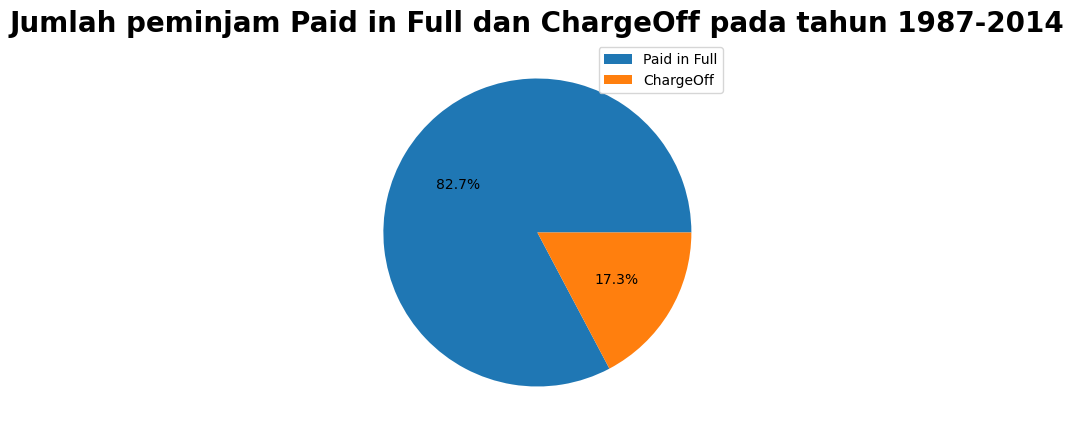

In [159]:
plt.figure(figsize=(8,5))

plt.pie(pd.Series(df_eda['MIS_Status']).value_counts(), autopct='%1.1f%%')
plt.title('Jumlah peminjam Paid in Full dan ChargeOff pada tahun 1987-2014', color='black', fontsize=20, fontweight='bold')
plt.legend(['Paid in Full', 'ChargeOff'])

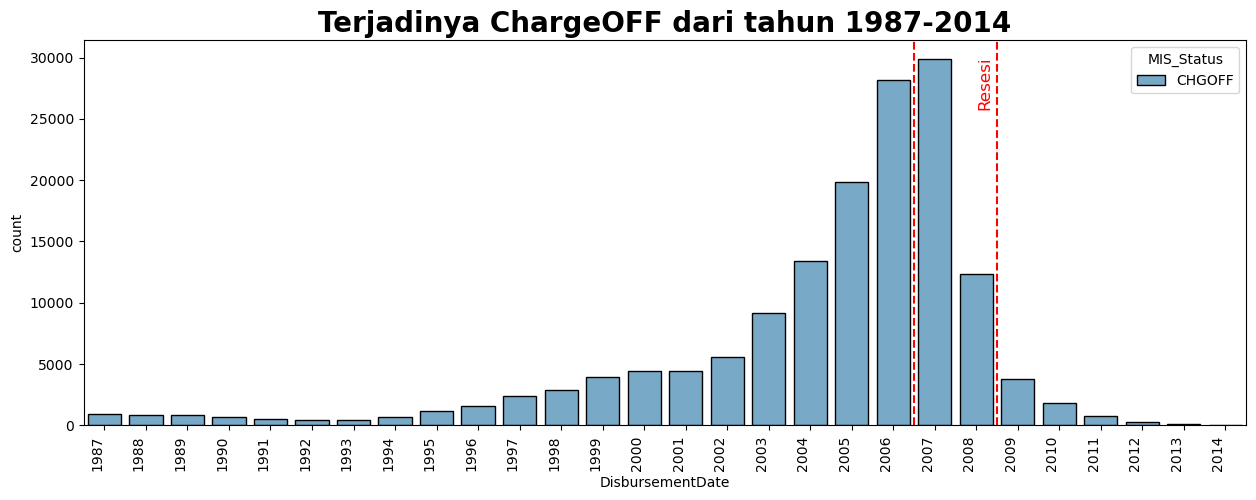

In [160]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df_eda, x=df_eda['DisbursementDate'].dt.year, hue='MIS_Status', palette='Blues',
              hue_order=['CHGOFF'], lw=1, ec='k')

## Menambahkan garis vertikal pada posisi 2007
plt.axvline(x=19.5, color='red', linestyle='--')

## Menambahkan garis vertikal pada posisi 2009
plt.axvline(x=21.5, color='red', linestyle='--')

## Menambahkan text resesi tepat diatas tahun 2008
plt.text(21.2, 26000, 'Resesi', color='red', fontsize=12, ha='center', rotation=90)

plt.title('Terjadinya ChargeOFF dari tahun 1987-2014', fontsize=20, fontweight='bold')
plt.xticks(rotation=90, ha='right')
plt.show()


#### Result

ChargeOFF meningkat pada tahun 2007, ini disebabkan karna adanya resesi di USA pada tahun tersebut.

In [124]:
## Membuat kolom baru industri dengan mengambil 2 digit pertama pada kolom NAICS
df_eda['industri'] = df_eda['NAICS'].apply(lambda x: x[:2])

## Melakukan mapping industri berdasarkan 2 digit pertama NAICS
df_eda['industri'] = df_eda['industri'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

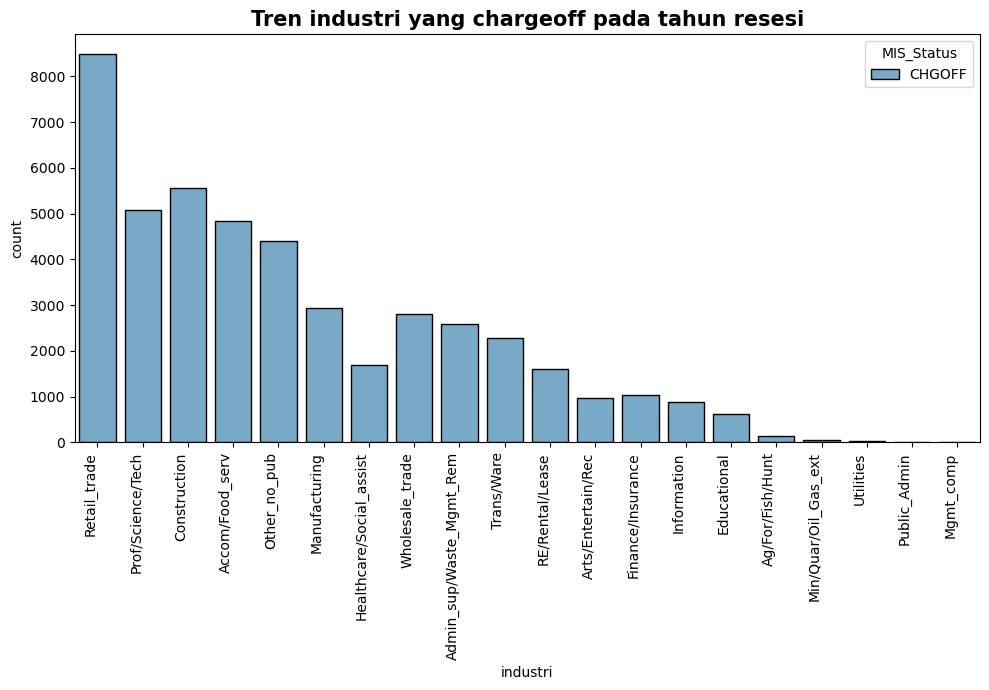

In [162]:
plt.figure(figsize=(10, 7))

industri_counts = df_eda[(df_eda['DisbursementDate'].dt.year >= 2007) & (df_eda['DisbursementDate'].dt.year <= 2009)]['industri'].value_counts().sort_values(ascending=False)

sns.countplot(data=df_eda[(df_eda['DisbursementDate'].dt.year >= 2007) & (df_eda['DisbursementDate'].dt.year <= 2009)], 
              x='industri', hue='MIS_Status', hue_order=['CHGOFF'], palette='Blues', 
              lw=1, ec='k', orient='v', order=industri_counts.index)

plt.title('Tren industri yang chargeoff pada tahun resesi', fontsize=15, fontweight='bold')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

#### Result

Retail_trade merupakan industri yang paling tinggi ChgOff pada saat terjadinya resesi